# Лекция 2. Визуализация данных.

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('data/telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Делаем это, дабы не было проблем с df.hist()

d1 = {'Yes' : 1, 'No' : 0}
#d2 = {True : 1, False : 0}

df['International plan'] = df['International plan'].map(d1)
df['Voice mail plan'] = df['Voice mail plan'].map(d1)
#df['Churn'] = df.Churn.map(d2)

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.dtypes  # all are numbers, except for Churn

State                      object
Account length              int64
Area code                   int64
International plan          int64
Voice mail plan             int64
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

## 1. Признаки по одному
### 1.1. Количественные

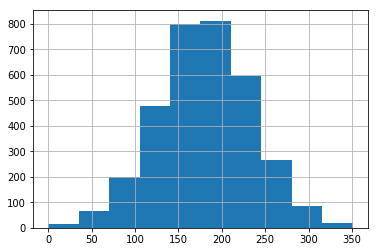

In [5]:
# Гистограмма
df['Total day minutes'].hist();

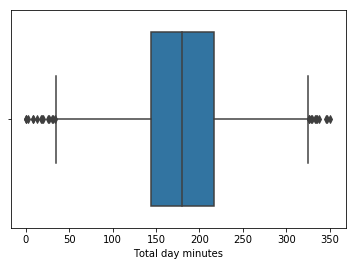

In [6]:
# Ящик с усами
# Посередине линия - медиана
# Левая граница - 0.25 квартиль, правая граница - 0.75 квартиль
sns.boxplot(df['Total day minutes']);

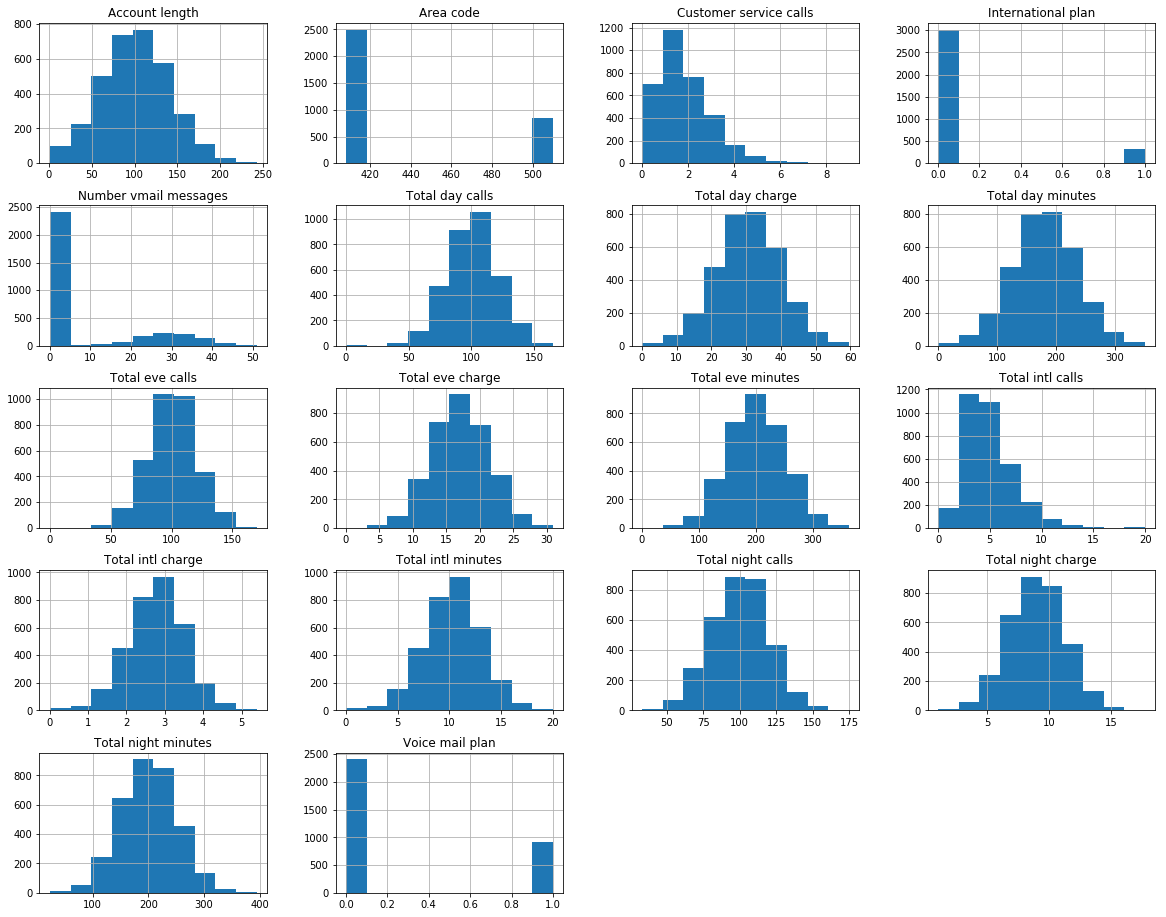

In [7]:
# Гистограммы для всех признаков
df.drop('Churn', axis=1).hist(figsize=(20,16));

In [8]:
df.describe()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## 1.2. Категориальные

In [9]:
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

In [10]:
df['Churn'].value_counts().head()  # мы уже сделали его числовым

False    2850
True      483
Name: Churn, dtype: int64

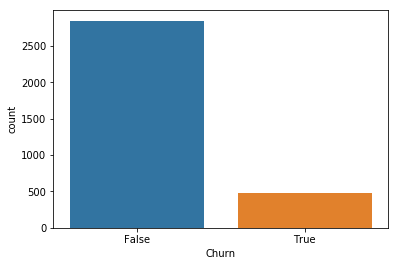

In [11]:
# Распределение категориального признака (уже числового)
sns.countplot(df['Churn']);

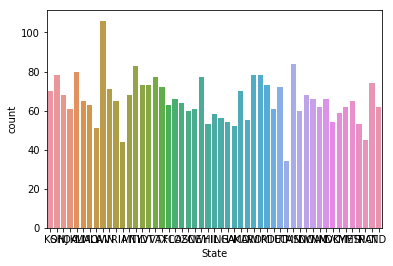

In [12]:
sns.countplot(df['State']);

In [13]:
df['State'].value_counts().head().index

Index(['WV', 'MN', 'NY', 'AL', 'WI'], dtype='object')

In [14]:
# В условии проверка вхождения
df[df['State'].isin(df['State'].value_counts().head().index)]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
5,AL,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
9,WV,141,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
15,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
44,WI,64,510,0,0,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,False
58,WI,68,415,0,0,0,148.8,70,25.30,246.5,164,20.95,129.8,103,5.84,12.1,3,3.27,3,False
62,MN,74,510,0,1,33,193.7,91,32.93,246.1,96,20.92,138.0,92,6.21,14.6,3,3.94,2,False
67,MN,113,408,1,0,0,125.2,93,21.28,206.4,119,17.54,129.3,139,5.82,8.3,8,2.24,0,False
71,MN,162,510,0,1,46,224.9,97,38.23,188.2,84,16.00,254.6,61,11.46,12.1,2,3.27,0,False
75,MN,50,415,0,0,0,157.1,90,26.71,223.3,72,18.98,181.4,111,8.16,6.1,2,1.65,1,False
77,NY,144,408,0,0,0,61.6,117,10.47,77.1,85,6.55,173.0,99,7.79,8.2,7,2.21,4,True


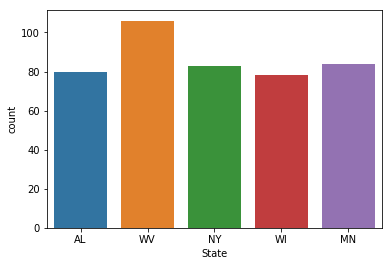

In [15]:
sns.countplot(df[df['State'].isin(df['State'].value_counts().head().index)]['State']);

## 2. Взаимодействие
### 2.1. Кол.-кол.

In [16]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [17]:
feat = [f for f in df.columns if 'charge' in f]
feat

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

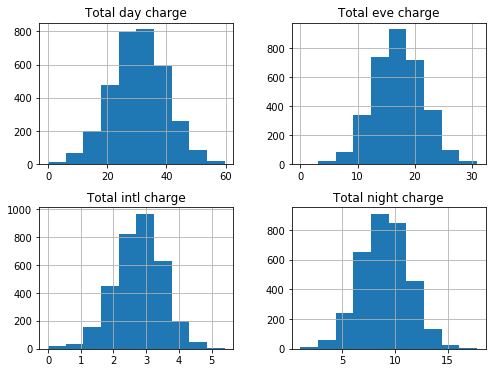

In [18]:
df[feat].hist(figsize=(8,6));

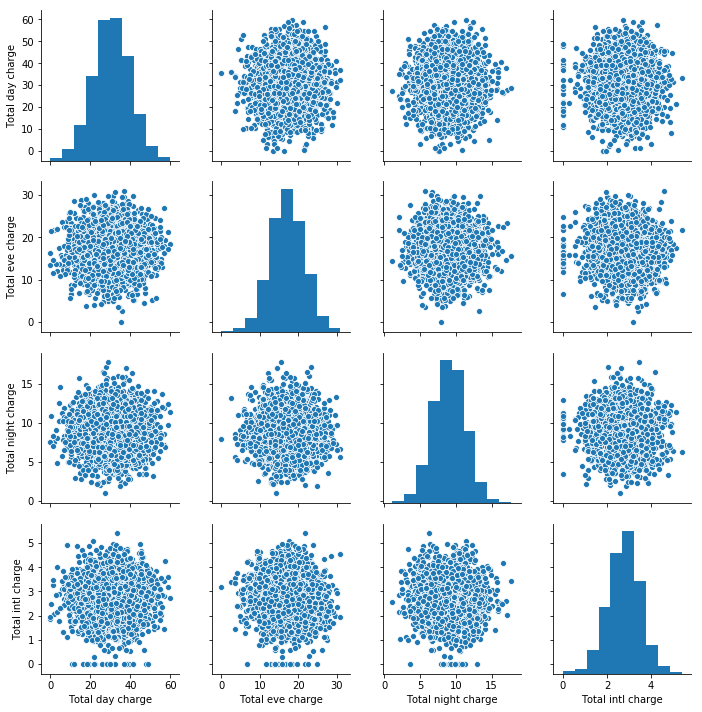

In [19]:
# На диагонали - распределение
# Вне диагонали - диаграммы рассеяния
sns.pairplot(df[feat]);

In [20]:
colors = df['Churn'].map({False: 'blue', True: 'orange'})
print(colors.head(12))

0       blue
1       blue
2       blue
3       blue
4       blue
5       blue
6       blue
7       blue
8       blue
9       blue
10    orange
11      blue
Name: Churn, dtype: object


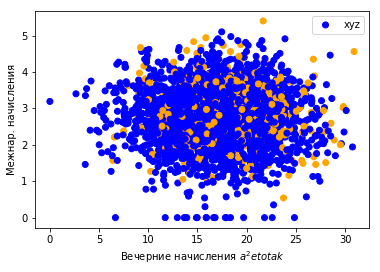

In [21]:
plt.scatter(df['Total eve charge'], df['Total intl charge'],
           color=colors, label='xyz');

plt.xlabel('Вечерние начисления $a^2etotak$');
plt.ylabel('Межнар. начисления');

plt.legend();

In [22]:
# Все лояльные
df[-df['Churn']].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


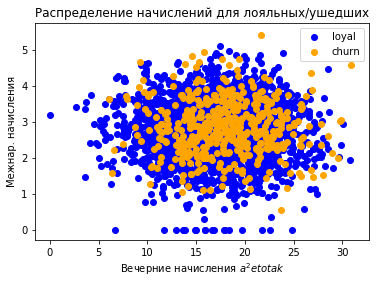

In [23]:
plt.scatter(df[-df['Churn']]['Total eve charge'], df[-df['Churn']]['Total intl charge'],
           color='blue', label='loyal');
plt.scatter(df[df['Churn']]['Total eve charge'], df[df['Churn']]['Total intl charge'],
           color='orange', label='churn');

plt.xlabel('Вечерние начисления $a^2etotak$');
plt.ylabel('Межнар. начисления');
plt.title('Распределение начислений для лояльных/ушедших')
plt.legend();

In [24]:
# Корреляции
df.corr()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
International plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
Voice mail plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
Number vmail messages,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233


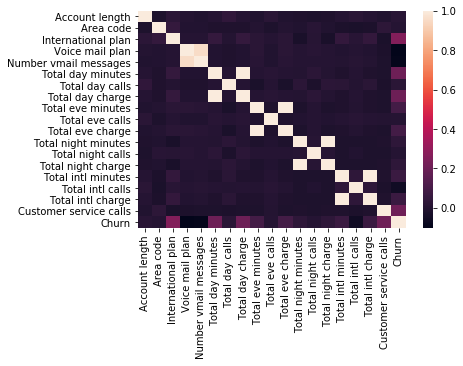

In [25]:
# тоже корреляция
sns.heatmap(df.corr());

# КАК ПРАВИЛЬНО УДАЛИТЬ ЧТО-ТО ИЗ DATAFRAME

In [26]:
feat

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

In [27]:
# Скрыли признаки, содержащие в названии charge
df.drop(feat, axis=1).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [28]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [29]:
# Совсем удалили признаки, содержащие в названии charge
# Исходный датафрейм изменился, потому что inplace=True!
df.drop(feat, axis=1, inplace=True)

In [30]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total eve minutes', 'Total eve calls',
       'Total night minutes', 'Total night calls', 'Total intl minutes',
       'Total intl calls', 'Customer service calls', 'Churn'],
      dtype='object')

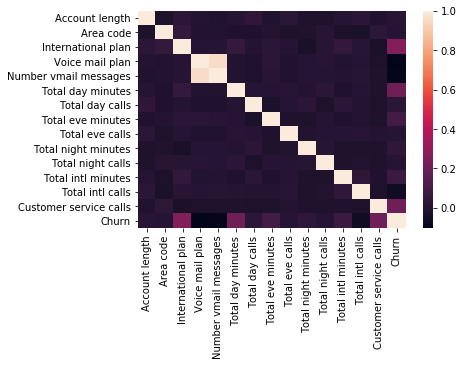

In [31]:
sns.heatmap(df.corr());

### 2.2. Кол.-кат. + кол.-бинар.

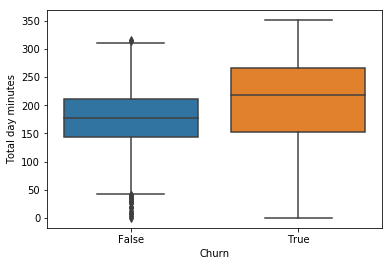

In [32]:
sns.boxplot(x='Churn', y='Total day minutes', data=df);

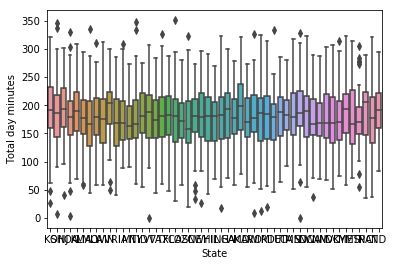

In [33]:
sns.boxplot(x='State', y='Total day minutes', data=df);

c:\users\811840\envs\cs102\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


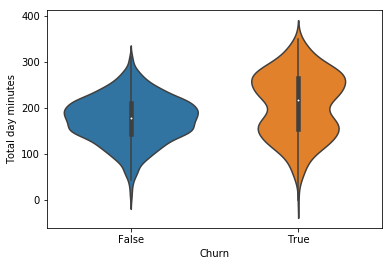

In [35]:
sns.violinplot(x='Churn', y='Total day minutes', data=df);

In [36]:
df.groupby('International plan')

In [37]:
df.groupby('International plan')['Total day minutes'].mean()

International plan
0    178.893887
1    187.986997
Name: Total day minutes, dtype: float64

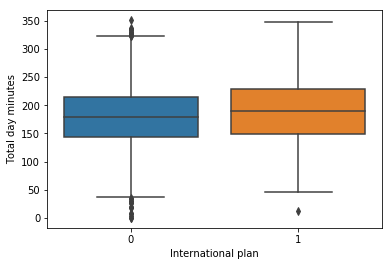

In [38]:
sns.boxplot(x='International plan', y='Total day minutes', data=df);

### 2.3. Кат. - кат.

Уже не кат...

In [39]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,0,1
Churn,,
False,2664,186
True,346,137


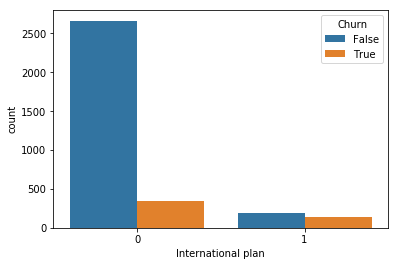

In [40]:
sns.countplot(x='International plan', hue='Churn', data=df);

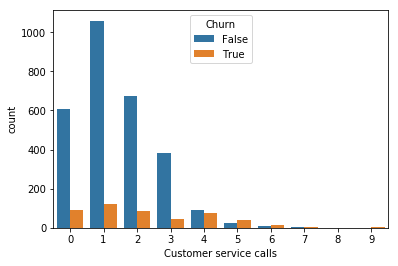

In [41]:
# НО тут порядковый признак Csc
sns.countplot(x='Customer service calls', hue='Churn', data=df);

# t-SNE

* eto slozhno

In [42]:
# We don't have the module
from sklearn.manifold import TSNE
# apparently, we do